## **IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



---



## **LOADING THE DATASET**

In [4]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


### Dynamics of the dataset

In [6]:
df.shape

(11251, 15)

### Overall Information of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB




---



# **DATA CLEANING**

## Imputing Missing Values

In [8]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64




>* *As we can see that Status and unnamed1 columns have 100% missing values*.
>* *We will drop these two columns as they are of no use to our analysis*






In [9]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
df.dropna(inplace=True)

### Change in dynamics of dataset.

In [12]:
df.shape

(11239, 13)

### Change in Datatype

In [15]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

>*Here we will change Dtype of Amount column from float type to integer.*

In [ ]:
df['Amount'].astype['int']

### Description of Numerical Columns

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000




---



---

# **EXPLORATORY DATA ANALYSIS**

## Gender


In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

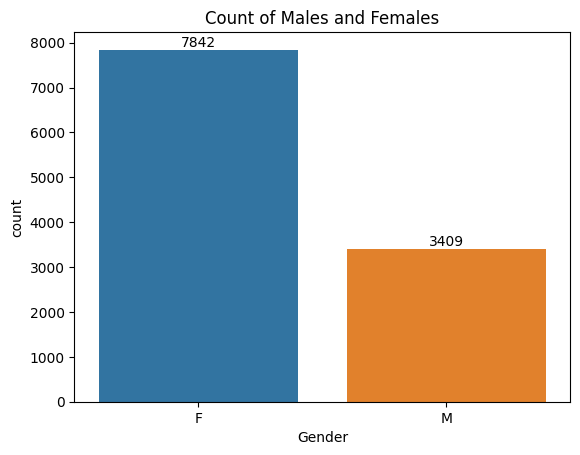

In [23]:
Grph1 = sns.countplot(x='Gender',data=df,hue='Gender')
for bars in Grph1.containers:
    Grph1.bar_label(bars)
plt.title('Count of Males and Females')
plt.show()

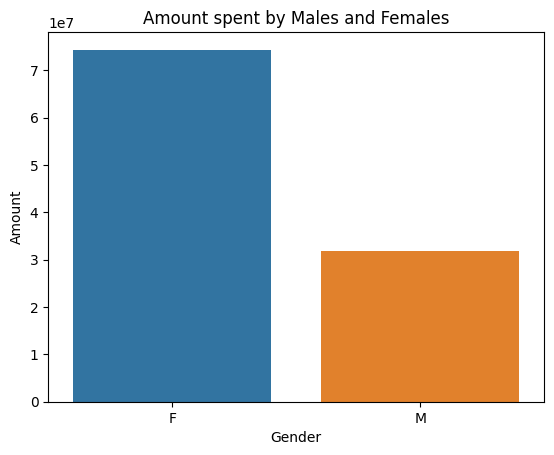

In [22]:
sample=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sample,hue='Gender')
plt.title('Amount spent by Males and Females')
plt.show()

>*From above graphs we can see that most of the buyers are Females and even the purchasing power of Females are higher than Men.*

## Age

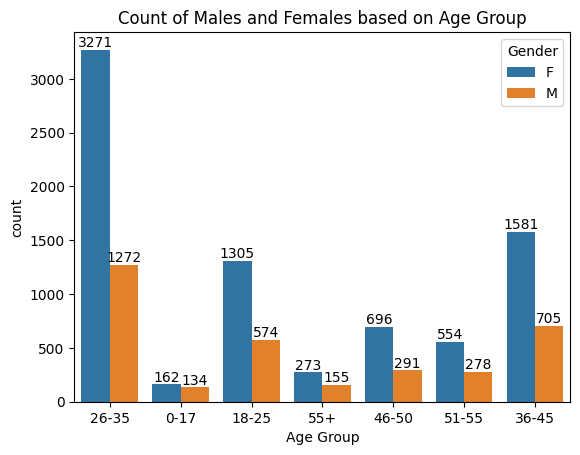

In [30]:
Grph2= sns.countplot(x='Age Group',data=df,hue='Gender')
for bar in Grph2.containers:
    Grph2.bar_label(bar)
plt.title('Count of Males and Females based on Age Group')
plt.show()    

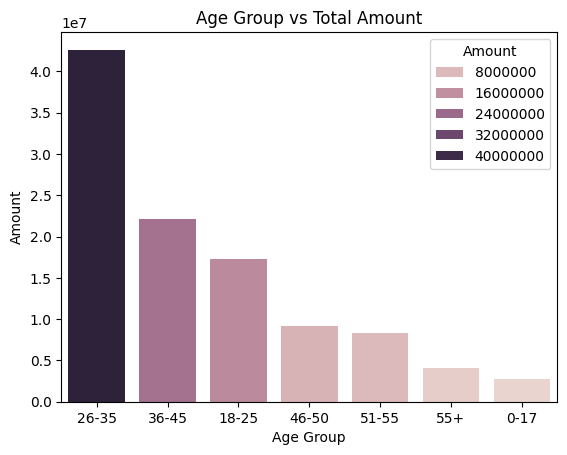

In [31]:
Ax=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)
sns.barplot(x='Age Group',y='Amount',data=Ax,hue='Amount')
plt.title('Age Group vs Total Amount')
plt.show()

> *From the above graphs we can see that most of the buyers are of age group 26-35 Females*

## State

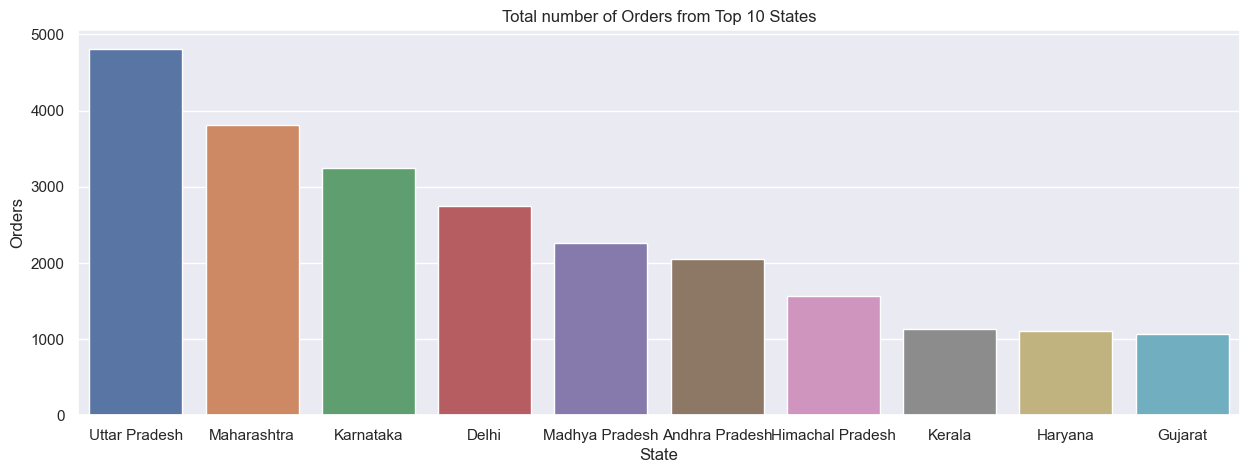

In [44]:
stte= df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(['Orders'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data=stte,hue='State')
plt.title('Total number of Orders from Top 10 States')
plt.show()

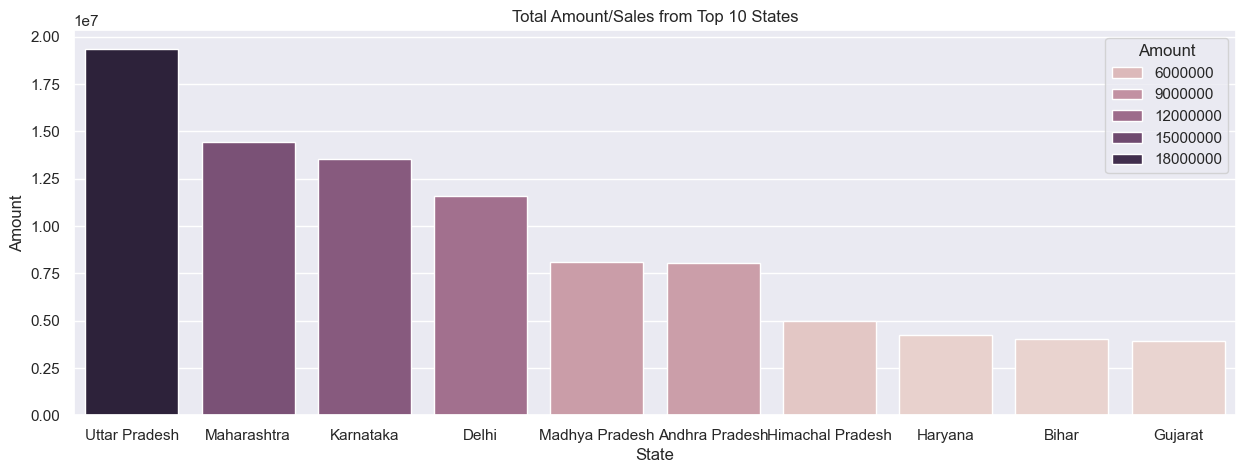

In [64]:
ste= df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount',data=ste,hue='Amount')
plt.title('Total Amount/Sales from Top 10 States')
plt.show()

> *From the above graph we can see that UttarPradesh, Maharashtra and Karnataka are top 3 states having maximum number of Sales and Orders respectively*

## Marital Status

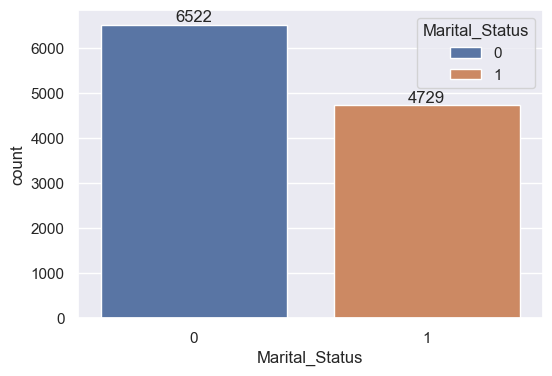

In [26]:
grph4= sns.countplot(x='Marital_Status',data=df,hue='Marital_Status')
sns.set(rc={'figure.figsize':(6,4)})
for bars in grph4.containers:
    grph4.bar_label(bars)


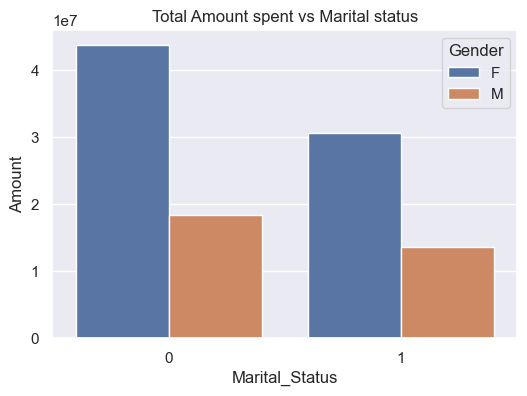

In [25]:
axs = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=axs,hue='Gender')
plt.title('Total Amount spent vs Marital status')
plt.show()


> *We can see here that Most of the buyers are Married(Woman) and have high purchasing power.*

## Occupation

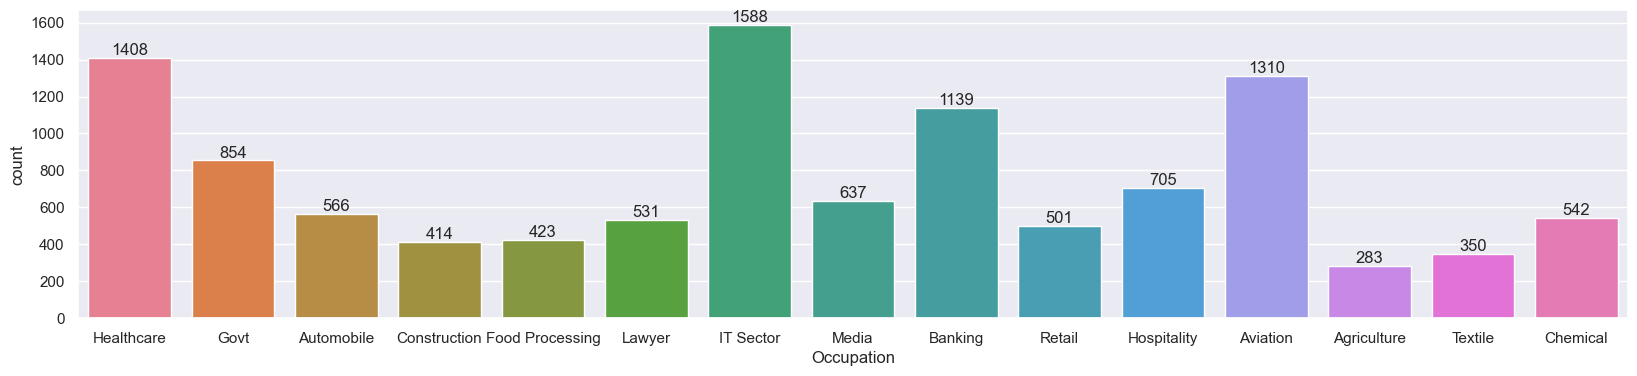

In [16]:
sns.set(rc={'figure.figsize':(20,4)})
occ= sns.countplot(data=df,x='Occupation',hue='Occupation')
for bars in occ.containers:
    occ.bar_label(bars)

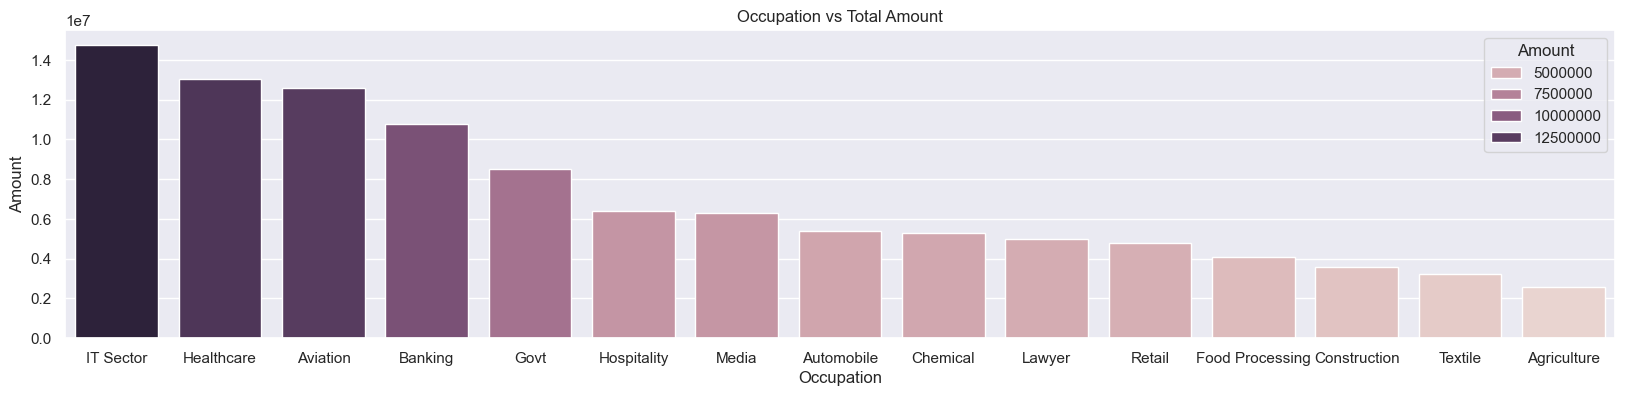

In [32]:
sns.set(rc={'figure.figsize':(20,4)})
occ_data= df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False)
grh=sns.barplot(x='Occupation',y='Amount',data=occ_data,hue='Amount')
plt.title('Occupation vs Total Amount')
plt.show()

> *From the above graph we can see that most of the buyers belongs to IT sector, Healthcare, Aviation.*

## Product Category

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

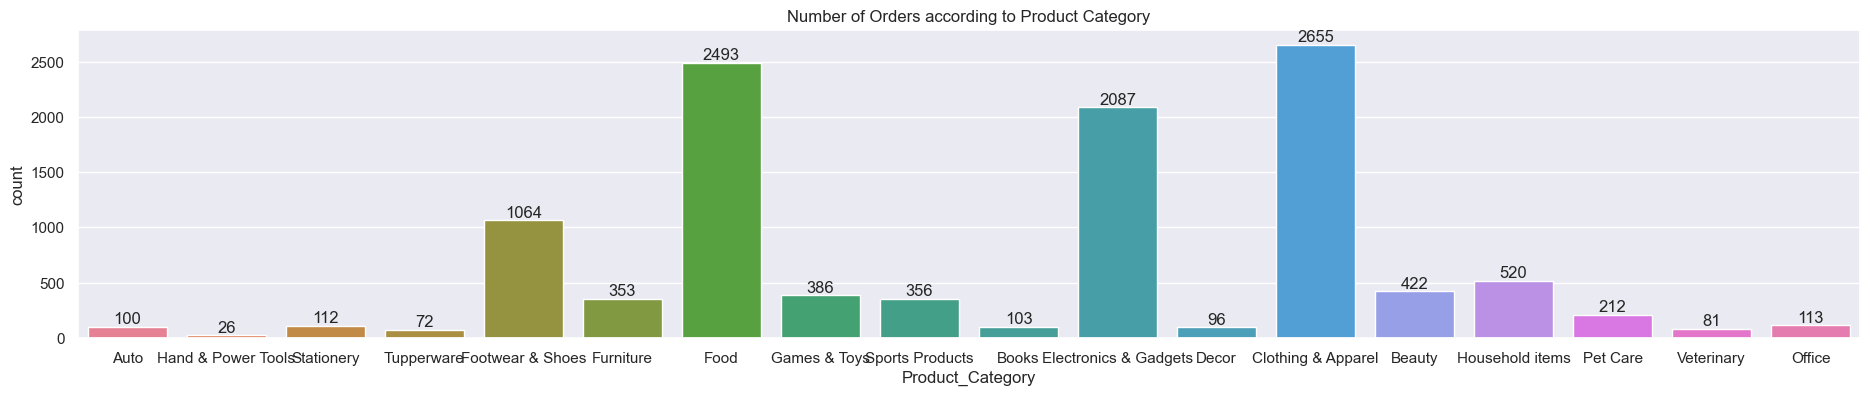

In [42]:
sns.set(rc={'figure.figsize':(23,4)})
prd = sns.countplot(x='Product_Category',data=df,hue='Product_Category')
for bars in prd.containers:
    prd.bar_label(bars)
plt.title('Number of Orders according to Product Category') 
plt.show()

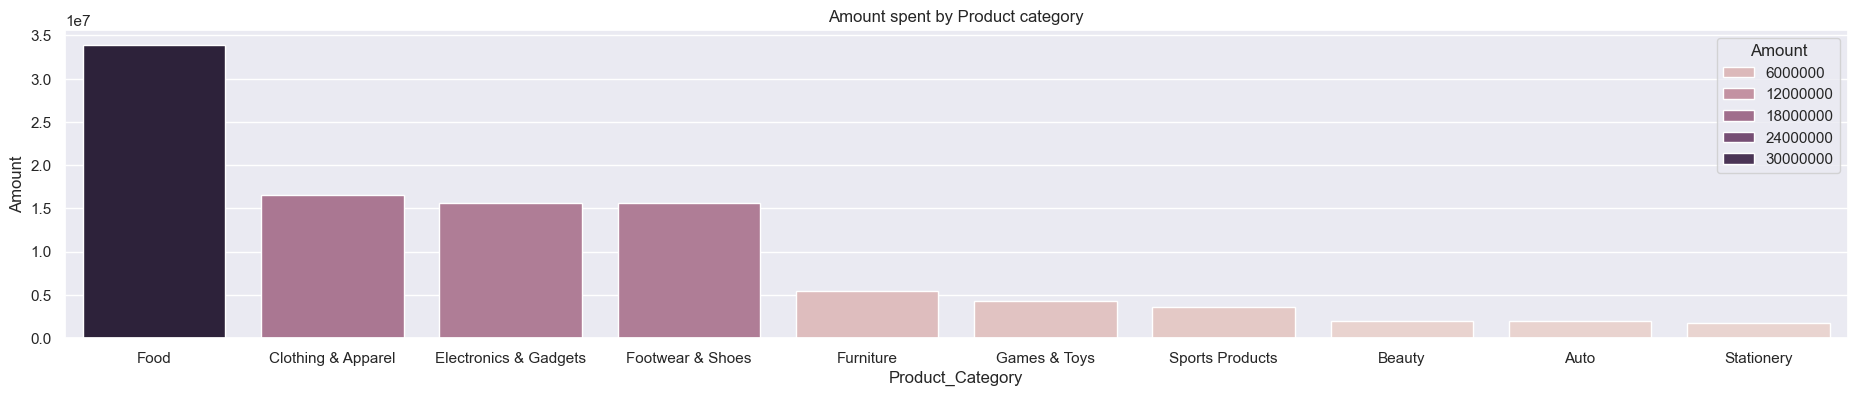

In [47]:
pds= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False).head(10)
sns.barplot(x='Product_Category',y='Amount',data=pds,hue='Amount')
plt.title('Amount spent by Product category')
plt.show()

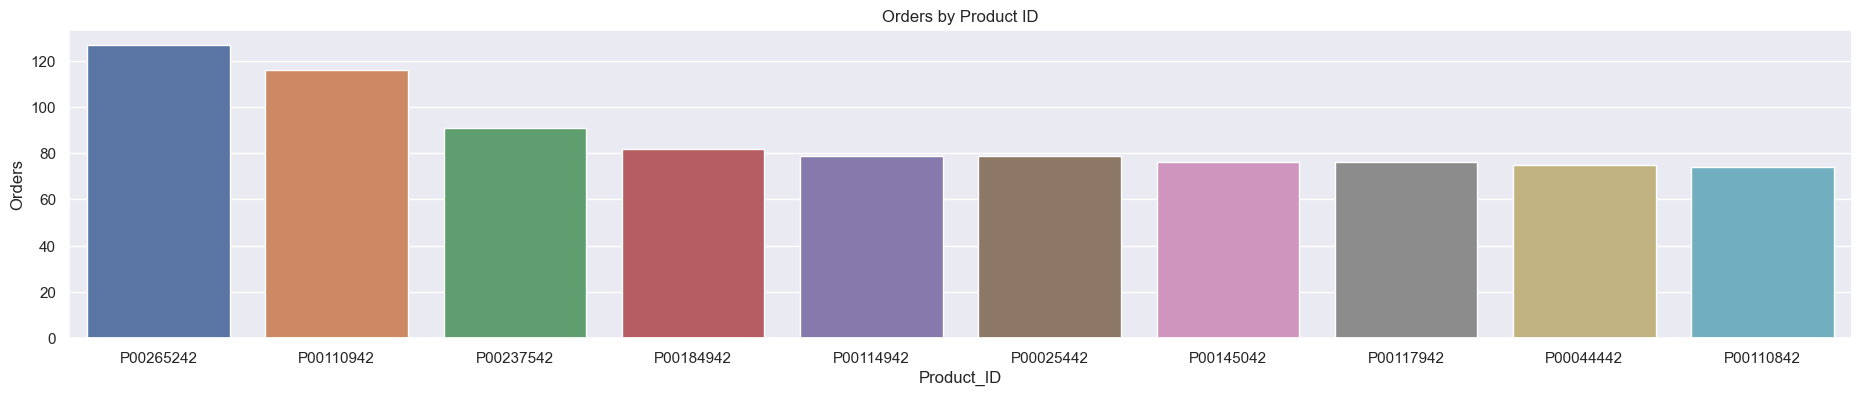

In [50]:
ods= df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(['Orders'],ascending=False).head(10)
sns.barplot(x='Product_ID',y='Orders',data=ods,hue='Product_ID')
plt.title('Orders by Product ID')
plt.show()

---

# CONCLUSION:

> *    **Gender**: *Females* are the majority of buyers and tend to spend more than males.
> *    **Age**: The *26-35* age group, particularly females, has the highest buying power.
> *    **State**: *Uttar Pradesh, Maharashtra, and Karnataka* contribute the most orders and sales.
> *    **Marital Status**: *Married women*, especially, are high spenders.
> *    **Occupation**: *IT, Healthcare, and Aviation* sectors have the most buyers.
> *    **Product Category**: *Food, Clothing, and Electronics* categories see the most sales.*